In [23]:
%load_ext nbextension
from datetime import datetime
from gswp import etl
from gswp.typing import Array
from gswp.constants import GMGSI, PROBSEVERE


START = datetime.fromisoformat("2022-03-01")
END = datetime.fromisoformat("2022-09-30")

In [49]:
import pandas as pd

import s3fs

fs = s3fs.S3FileSystem(anon=True)
dr = pd.date_range(START, END)
dts = [f"noaa-goes16/ABI-L1b-RadC/2022/{d:03}" for d in dr.dayofyear]
file = [fs.ls(h) for h in fs.ls(dts[0])[:1]][0][0]
file

'noaa-goes16/ABI-L1b-RadC/2022/060/00/OR_ABI-L1b-RadC-M6C01_G16_s20220600001174_e20220600003547_c20220600003584.nc'

In [50]:
import io
import xarray as xr

with fs.open(file) as f:
    ds = xr.open_dataset(io.BytesIO(f.read()), engine="h5netcdf", chunks={})

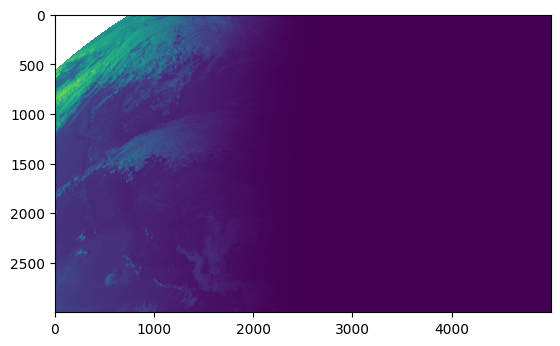

In [60]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(ds["Rad"].to_numpy())
# np.rad2deg(ds.y)

In [ ]:

for param in GMGSI.PARAMETERS:
    etl.gmgsi(START, END, product=param)


In [2]:

%time GMGSI.load()
ds = GMGSI.load()
total_size = sum(ds[var].size for var in ds)
print(f"{total_size=:,}")
ds


CPU times: user 326 ms, sys: 12.2 ms, total: 338 ms
Wall time: 395 ms
total_size=227,339,523,000


<xarray.Dataset>
Dimensions:    (lat: 3000, lon: 4999, time: 5053)
Coordinates:
  * lat        (lat) float32 -72.74 -72.72 -72.69 -72.67 ... 72.67 72.69 72.72
  * lon        (lon) float32 -179.9 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * time       (time) datetime64[ns] 2022-03-04 ... 2022-09-30T23:00:00
Data variables:
    GMGSI_LW   (time, lat, lon) float32 dask.array<chunksize=(1, 3000, 4999), meta=np.ndarray>
    GMGSI_WV   (time, lat, lon) float32 dask.array<chunksize=(1, 3000, 4999), meta=np.ndarray>
    GMGSI_VIS  (time, lat, lon) float32 dask.array<chunksize=(1, 3000, 4999), meta=np.ndarray>
Attributes:
    Conventions:          CF-1.4
    NCO:                  netCDF Operators version 4.7.5 (Homepage = http://n...
    Satellite Sensor:     DERIVED DATA
    Source:               McIDAS Area File
    history:              Fri Sep 30 00:38:28 2022: ncks -d xc,0,4998 tempo.n...
    instrument_name:      GLOBCOMPLIR
    time_coverage_start:  2022-09-30T00:00:00

In [ ]:
etl.probsevere(START, END)

In [3]:
%time PROBSEVERE.load()
ps = PROBSEVERE.load()
total_size = sum(ps[var].size for var in ps)
print(f"{total_size=:,}")
ps

CPU times: user 1.01 s, sys: 91.4 ms, total: 1.1 s
Wall time: 1.1 s
total_size=479,892,840


<xarray.Dataset>
Dimensions:            (time: 17139030)
Coordinates:
  * time               (time) datetime64[ns] 2022-03-01T00:00:29 ... 2022-09-...
Data variables: (12/28)
    CAPE_M10M30        (time) uint32 dask.array<chunksize=(5192,), meta=np.ndarray>
    EBSHEAR            (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>
    FLASH_DENSITY      (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>
    FLASH_RATE         (time) uint32 dask.array<chunksize=(5192,), meta=np.ndarray>
    ID                 (time) uint32 dask.array<chunksize=(5192,), meta=np.ndarray>
    LJA                (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>
    ...                 ...
    maxx               (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>
    maxy               (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>
    minx               (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>
    miny               (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>
    x                  (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>
    y                  (time) float32 dask.array<chunksize=(5192,), meta=np.ndarray>